In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# cargar dataset
academic_performance = pd.read_csv('enhanced_student_habits_performance_dataset.csv')
academic_performance.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [5]:
# aplicar normalzación
scaler_norm = MinMaxScaler()

# fit: calcula el minimo el maximo de cada columna
# transform: aplica la formula anterior a cada dato
academic_performance['study_hours_per_day_norm'] = scaler_norm.fit_transform(academic_performance[['study_hours_per_day']])
academic_performance['screen_time_norm'] = scaler_norm.fit_transform(academic_performance[['screen_time']])


academic_performance[['study_hours_per_day', 'study_hours_per_day_norm', 'screen_time', 'screen_time_norm']].head()

,study_hours_per_day,study_hours_per_day_norm,screen_time,screen_time_norm
0,7.645367,0.637114,10.9,0.512077
1,5.700000,0.475000,8.3,0.386473
2,2.400000,0.200000,8.0,0.371981
3,3.400000,0.283333,11.7,0.550725
4,4.700000,0.391667,9.4,0.439614


In [6]:
# Aplicar estandarización a la asistencia (%)
scaler_std = StandardScaler()

# fit: calcula la media y desviacion de cada columna
# transform: aplica un formula para centrar los datos en 0 con varianza a 1
academic_performance['attendance_percentage_std'] = scaler_std.fit_transform(academic_performance[['attendance_percentage']])

academic_performance[['attendance_percentage', 'attendance_percentage_std']].head()

,attendance_percentage,attendance_percentage_std
0,70.3,0.019161
1,88.4,1.063417
2,82.1,0.699947
3,79.3,0.538405
4,62.9,-0.407773


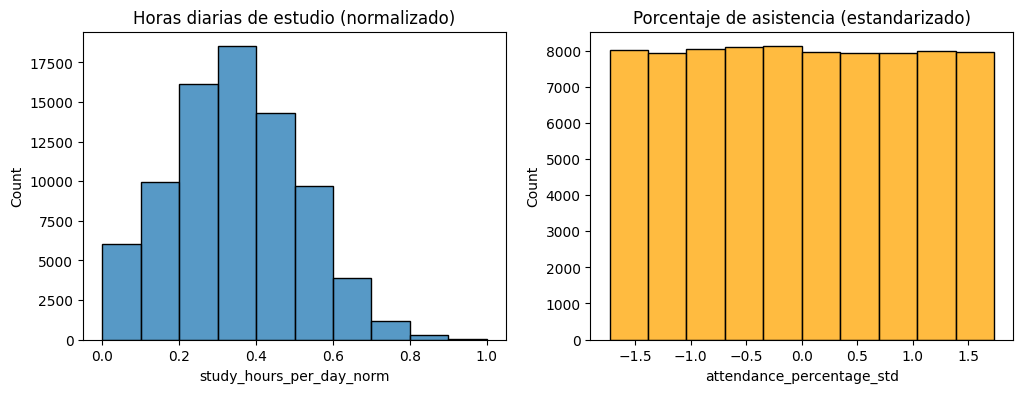

In [7]:
# graficar y observar que los plot se vean limpios
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4)) # crea dos ejes en una fila para cada histograma

# visualizar horas de estudio (normalización)
sns.histplot(academic_performance['study_hours_per_day_norm'], bins=10, ax=ax[0])
ax[0].set_title('Horas diarias de estudio (normalizado)')

# visualizar asistencia (estandarización)
sns.histplot(academic_performance['attendance_percentage_std'], bins=10, ax=ax[1], color='orange')
ax[1].set_title('Porcentaje de asistencia (estandarizado)')

plt.show()